In [123]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model

In [124]:


training_path = r"D:\Downloads\ML-Project\Fashion-dataset\train"

testing_path = r"D:\Downloads\ML-Project\Fashion-dataset\test"

val_path = r"D:\Downloads\ML-Project\Fashion-dataset\val-set"

In [125]:

datagen_train = ImageDataGenerator(rescale =1./255, 
                                   rotation_range=30,
                                   horizontal_flip=True)

datagen_test = ImageDataGenerator(rescale =1./255,
                                   rotation_range=30,
                                   horizontal_flip=True)

datagen_val = ImageDataGenerator(rescale =1./255,
                                   rotation_range=30,
                                   horizontal_flip=True)

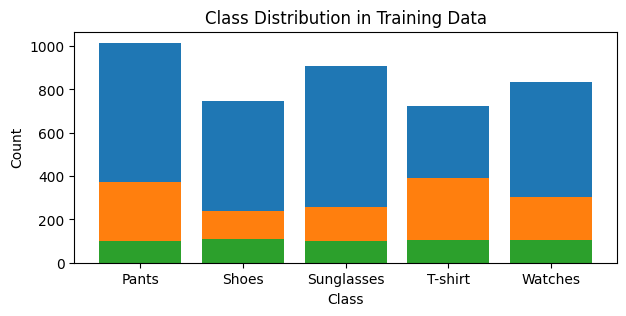

In [126]:


def visualize_class_distribution(training_path,testing_path,val_path):
    classes1 = os.listdir(training_path)
    classes2 = os.listdir(testing_path)
    classes3 = os.listdir(val_path)
    class_counts1 = Counter()
    class_counts2 = Counter()
    class_counts3 = Counter()

    for class_name in classes1:
        class_path1 = os.path.join(training_path, class_name)
        class_counts1[class_name] = len(os.listdir(class_path1))
    for class_name in classes2:
        class_path2 = os.path.join(testing_path, class_name)
        class_counts2[class_name] = len(os.listdir(class_path2))
    for class_name in classes3:
        class_path3 = os.path.join(val_path, class_name)
        class_counts3[class_name] = len(os.listdir(class_path3))

    plt.figure(figsize=(7, 3))
    plt.bar(class_counts1.keys(), class_counts1.values())
    plt.bar(class_counts2.keys(), class_counts2.values())
    plt.bar(class_counts3.keys(), class_counts3.values())
    plt.title('Class Distribution in Training Data')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

visualize_class_distribution(training_path,testing_path,val_path)

In [127]:

training_set = datagen_train.flow_from_directory(training_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')
test_set = datagen_test.flow_from_directory(testing_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')
val_set = datagen_val.flow_from_directory(val_path,
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='sparse')


Found 4231 images belonging to 5 classes.
Found 1559 images belonging to 5 classes.
Found 517 images belonging to 5 classes.


In [14]:

model = Sequential()

model.add(Conv2D(64, (7, 7), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 218, 218, 64)      9472      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 109, 109, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 103, 103, 128)     401536    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 51, 51, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 47, 47, 256)       819456    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 256)      

In [135]:
model.fit(training_set, batch_size=100, epochs=5,validation_data= val_set) 

Epoch 1/5
67/67 [==============================] - 533s 8s/step - loss: 0.2412 - accuracy: 0.9206 - val_loss: 0.4960 - val_accuracy: 0.8356
Epoch 2/5
67/67 [==============================] - 548s 8s/step - loss: 0.2452 - accuracy: 0.9180 - val_loss: 0.5144 - val_accuracy: 0.8337
Epoch 3/5
67/67 [==============================] - 538s 8s/step - loss: 0.2309 - accuracy: 0.9237 - val_loss: 0.4626 - val_accuracy: 0.8375
Epoch 4/5
67/67 [==============================] - 640s 10s/step - loss: 0.2393 - accuracy: 0.9208 - val_loss: 0.4906 - val_accuracy: 0.8356
Epoch 5/5
67/67 [==============================] - 613s 9s/step - loss: 0.2270 - accuracy: 0.9244 - val_loss: 0.4851 - val_accuracy: 0.8395


In [136]:
from keras.models import save_model


model.save("D:\Downloads\Model\model5.h5")

In [ ]:

model = load_model("D:\Downloads\Model\model5.h5")

In [137]:

feature_extraction_model = Model(inputs=model.input, outputs=model.layers[-2].output)

In [138]:

feature_vectors = []
for i in range(len(training_set.filenames)):
    img_path = os.path.join(r"D:\Downloads\ML-Project\Fashion-dataset\train", training_set.filenames[i])
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255., axis=0)
    feature_vector = feature_extraction_model.predict(img_array)
    feature_vectors.append((training_set.filenames[i], feature_vector.flatten()))

1/1 [==============================] - 0s 59ms/step


In [139]:

np.save('extracted_features2.npy', np.array(feature_vectors, dtype=object))

# Feature Extraction from Dataset

In [140]:

loaded_features = np.load('extracted_features2.npy', allow_pickle=True)

In [191]:
test_image_path = r"D:\Downloads\Test_images\tshirt.jpg"

In [192]:


test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image_arr = image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image_arr / 255., axis=0)
test_image_features = feature_extraction_model.predict(test_image_arr)

1/1 [==============================] - 0s 52ms/step


In [193]:


similarities = []
for filename, feature_vector in loaded_features:
    similarity = np.dot(test_image_features, feature_vector.T) / (np.linalg.norm(test_image_features) * np.linalg.norm(feature_vector))
    similarities.append((filename, similarity))

In [194]:

similarities.sort(key=lambda x: x[1], reverse=True)

# Plotting recommendations for our test image 

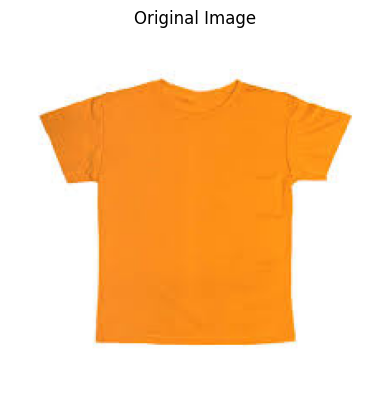

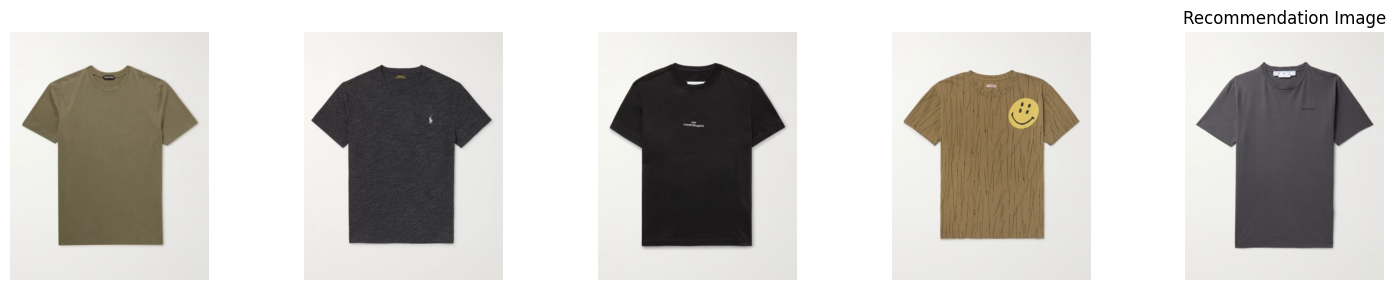

In [195]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


top_similarities = similarities[:5]


plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
plt.title("Recommendation Image")
for i, (filename, similarity) in enumerate(top_similarities):
    img_path = os.path.join(r"D:\Downloads\ML-Project\Fashion-dataset\train", filename)
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)
  
    axes[i].axis('off')

plt.tight_layout()
plt.show()
